# Description
This program uses an artifical recurrent neural network called Long Short Term Memory (LSTM) to predict the closing price of Apple Inc. using the past 60 day stock price.

### Reference:
https://youtu.be/QIUxPv5PJOY


## Import Libraries


In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Get Data

In [ ]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-31')

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-27,379.619995,373.920013,374.839996,379.239990,30303500.0,378.557434
2020-07-28,378.200012,372.989990,377.470001,373.010010,25906400.0,372.338684
2020-07-29,380.920013,374.850006,375.000000,380.160004,22582300.0,379.475800
2020-07-30,385.190002,375.070007,376.750000,384.760010,39532500.0,384.067535
2020-07-31,425.660004,403.299988,411.540009,425.040009,93584200.0,424.275024


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2159, 6)

## Visualize the data


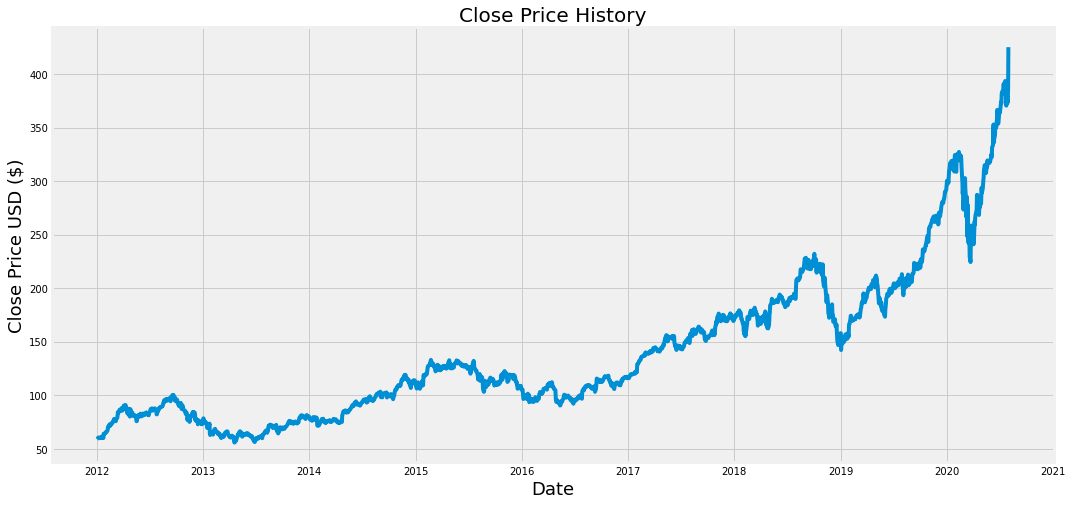

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Create the Training Set

In [ ]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train a model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1728

In [ ]:
# Scale the data to be (0, 1) inclusively

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00800851],
       [0.00886353],
       [0.01063932],
       ...,
       [0.87845632],
       [0.89091402],
       [1.        ]])

In [ ]:
# Create the training dataset from the scaled dataset
train_data = scaled_data[:training_data_len, :]

# Split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i,0])
  
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00800851, 0.00886353, 0.01063932, 0.01233001, 0.0120708 ,
       0.01265499, 0.01238804, 0.01193925, 0.01132798, 0.01321984,
       0.01492601, 0.01439984, 0.01151755, 0.0142683 , 0.01156011,
       0.02171583, 0.02093045, 0.0219557 , 0.02417255, 0.02551503,
       0.02540284, 0.02498888, 0.02675307, 0.02841279, 0.03029307,
       0.03333011, 0.03970984, 0.03980655, 0.04335816, 0.04601218,
       0.0414508 , 0.04320727, 0.04317245, 0.0480975 , 0.04739723,
       0.04869328, 0.05102233, 0.05231841, 0.05605184, 0.05877165,
       0.05955701, 0.0598317 , 0.05518136, 0.05405938, 0.05422575,
       0.05859753, 0.05982784, 0.06247025, 0.0686991 , 0.07700938,
       0.0754541 , 0.07545796, 0.08146629, 0.08334654, 0.08200792,
       0.08078538, 0.07951253, 0.08374116, 0.08664281, 0.08785763])]
[0.08485539492813565]

[array([0.00800851, 0.00886353, 0.01063932, 0.01233001, 0.0120708 ,
       0.01265499, 0.01238804, 0.01193925, 0.01132798, 0.01321984,
       0.01492601, 0.01439984, 0.01

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape

(1668, 60)

In [ ]:
# Reshape the x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1668, 60, 1)

## LSTM Model

In [ ]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1668/1668 [==============================] - 39s 23ms/step - loss: 3.6290e-04


## Testing data set

In [ ]:
# Create a new array containing caled values from index ... to ...
test_data = scaled_data[training_data_len-60:, :]
# Create the data sets x_test, and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# Convert to numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(431, 60, 1)

In [ ]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

11.168985852343347

In [ ]:
# Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Results

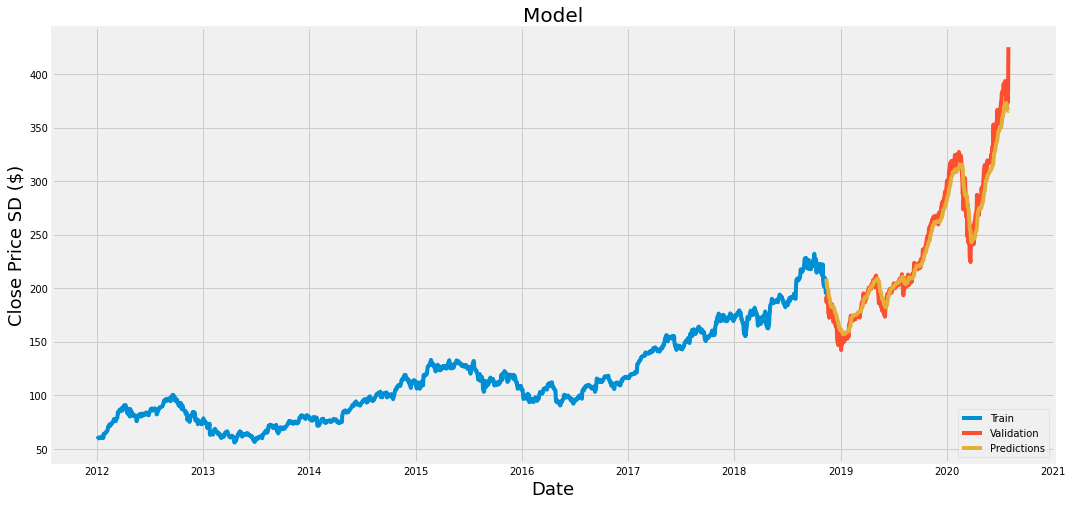

In [ ]:

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model',  fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price SD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()